# Proyek Machine Learning: Dataset Pengeluaran
- **Nama:** Leonard Bodhi Kumaro
- **Email:** bkleonard174@gmail.com
- **ID Dicoding:** leonardkumaro

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Membaca dataset dari file CSV
df = pd.read_csv('Dataset_Klasifikasi.csv')

# Menampilkan bentuk (jumlah baris dan kolom) dari dataset
print("Dataset shape:", df.shape)

# Menampilkan 5 baris pertama dari dataset untuk melihat struktur data
df.head()

Dataset shape: (4488, 7)


,provinsi,daerah,jenis,tahun,pengeluaran,pengeluaran_kategori,cluster
0,aceh,PERDESAAN,MAKANAN,2007.0,195176.0,Rendah,2
1,aceh,PERDESAAN,MAKANAN,2008.0,218781.0,Rendah,2
2,aceh,PERDESAAN,MAKANAN,2009.0,247427.0,Rendah,2
3,aceh,PERDESAAN,MAKANAN,2010.0,275749.0,Rendah,2
4,aceh,PERDESAAN,MAKANAN,2011.0,308000.0,Rendah,2


In [3]:
# Melakukan One-Hot Encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df, columns=['provinsi', 'jenis', 'daerah', 'pengeluaran_kategori'])

# Memisahkan fitur (X) dan label (y) setelah encoding
X = df_encoded.drop(columns=['cluster'])
y = df_encoded['cluster']

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Membagi dataset menjadi data latih (training set) dan data uji (test set)
# dengan proporsi 70% untuk data latih dan 30% untuk data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan jumlah data latih dan data uji setelah pembagian
print(f"Jumlah data latih: {X_train.shape[0]}")  # Jumlah baris pada data latih
print(f"Jumlah data uji: {X_test.shape[0]}")    # Jumlah baris pada data uji

Jumlah data latih: 3141
Jumlah data uji: 1347


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Membuat model RandomForestClassifier dengan random_state untuk hasil yang konsisten
model = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data latih (X_train dan y_train)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
# Melakukan prediksi pada data uji menggunakan model yang telah dilatih
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi Accuracy dan F1-Score
accuracy = accuracy_score(y_test, y_pred)  # Mengukur akurasi prediksi
f1 = f1_score(y_test, y_pred, average='weighted')  # Mengukur F1-Score dengan rata-rata berbobot

# Menampilkan hasil evaluasi model sebelum tuning
print("\nEvaluasi Model Klasifikasi (Sebelum Tuning):")
print("Accuracy:", accuracy)  # Menampilkan nilai akurasi
print("F1 Score:", f1)  # Menampilkan nilai F1-Score


Evaluasi Model Klasifikasi (Sebelum Tuning):
Accuracy: 0.9948032665181886
F1 Score: 0.9948017049634976


In [7]:
# Menampilkan laporan klasifikasi untuk evaluasi model sebelum tuning
# Laporan ini mencakup metrik seperti Precision, Recall, F1-Score, dan Support untuk setiap kelas
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       236
           1       1.00      0.99      0.99       534
           2       0.99      1.00      1.00       577

    accuracy                           0.99      1347
   macro avg       0.99      0.99      0.99      1347
weighted avg       0.99      0.99      0.99      1347



- Precision: Mengukur seberapa tepat model dalam memprediksi kelas tertentu.
- Recall: Mengukur seberapa baik model menangkap semua instance dari kelas tertentu.
- F1-Score: Rata-rata harmonis dari Precision dan Recall, memberikan gambaran keseimbangan antara keduanya.
- Support: Jumlah instance sebenarnya dari setiap kelas dalam data uji.
Dari laporan ini, kita dapat mengidentifikasi kelas mana yang memiliki performa terbaik dan kelas mana yang perlu ditingkatkan.

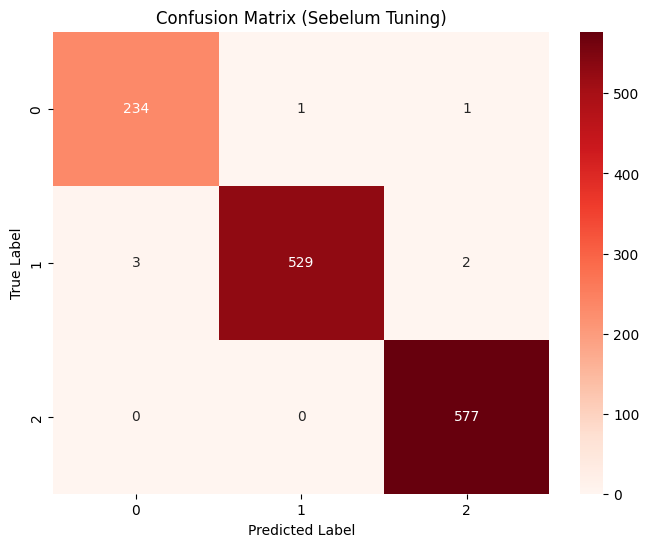

Analisis Confusion Matrix:
Jumlah prediksi benar (True Positives + True Negatives): 1340
Jumlah prediksi salah (False Positives + False Negatives): 7


In [8]:
# Menampilkan Confusion Matrix untuk evaluasi model sebelum tuning
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)  # Menghitung confusion matrix
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Reds',
)
plt.title("Confusion Matrix (Sebelum Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Analisis hasil Confusion Matrix
print("Analisis Confusion Matrix:")
print(f"Jumlah prediksi benar (True Positives + True Negatives): {conf_matrix.trace()}")
print(f"Jumlah prediksi salah (False Positives + False Negatives): {conf_matrix.sum() - conf_matrix.trace()}")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("\nBest Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [10]:
# Melakukan prediksi pada data uji menggunakan model yang telah dituning
y_pred_tuned = best_model.predict(X_test)

# Menghitung metrik evaluasi Accuracy dan F1-Score setelah tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

# Menampilkan hasil evaluasi model setelah tuning
print("\nEvaluasi Model Klasifikasi (Setelah Tuning):")
print("Accuracy:", accuracy_tuned)
print("F1 Score:", f1_tuned)


Evaluasi Model Klasifikasi (Setelah Tuning):
Accuracy: 0.9948032665181886
F1 Score: 0.9948047551502097


In [11]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       236
           1       0.99      0.99      0.99       534
           2       1.00      1.00      1.00       577

    accuracy                           0.99      1347
   macro avg       0.99      0.99      0.99      1347
weighted avg       0.99      0.99      0.99      1347



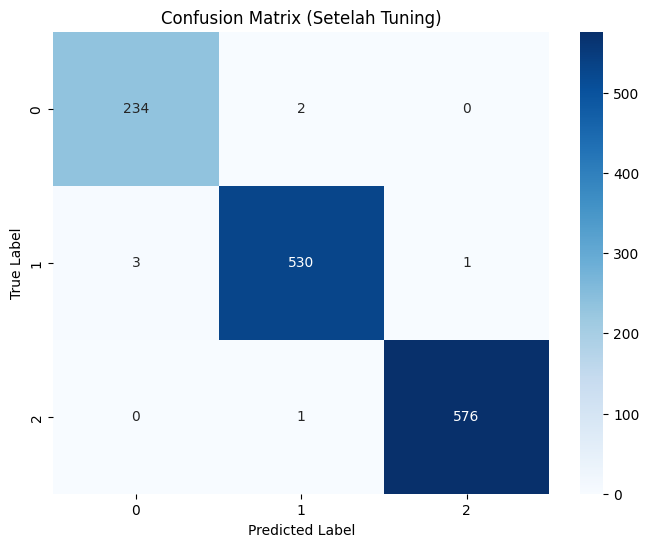

Analisis Confusion Matrix (Setelah Tuning):
Jumlah prediksi benar (True Positives + True Negatives): 1340
Jumlah prediksi salah (False Positives + False Negatives): 7


In [12]:
# Menampilkan Confusion Matrix untuk evaluasi model setelah tuning
plt.figure(figsize=(8, 6))
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)  # Menghitung confusion matrix setelah tuning
sns.heatmap(
    conf_matrix_tuned,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Confusion Matrix (Setelah Tuning)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Analisis hasil Confusion Matrix setelah tuning
true_positives_tuned = conf_matrix_tuned.trace()  # Jumlah prediksi benar (True Positives + True Negatives)
false_predictions_tuned = conf_matrix_tuned.sum() - true_positives_tuned  # Jumlah prediksi salah (False Positives + False Negatives)

print("Analisis Confusion Matrix (Setelah Tuning):")
print(f"Jumlah prediksi benar (True Positives + True Negatives): {true_positives_tuned}")
print(f"Jumlah prediksi salah (False Positives + False Negatives): {false_predictions_tuned}")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
  - Akurasi dan F1-score model sebelum tuning dan setelah tuning adalah 99.48%. Hal ini menunjukkan hasil akurasi dan F1-score sebelum tuning sama dengan setelah tuning. Dalam kasus ini, model sudah mencapai performa optimal, sehingga tuning tidak diperlukan. Namun, tuning tetap bisa dipertimbangkan untuk dataset lain atau kasus di mana performa model belum maksimal.
    

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu. 
  Precision dan Recall untuk semua kelas memiliki skor tinggi, yang berarti model tidak memiliki kelemahan dalam mengklasifikasikan data. Tidak ada indikasi bahwa model mengalami kesulitan dalam memprediksi kelas tertentu.
  
  - Apakah model mengalami overfitting atau underfitting?
  Model menunjukkan akurasi sempurna pada data yang diberikan. Namun, perlu diuji pada data baru (data testing atau validasi) untuk memastikan bahwa model tidak overfitting. Jika model juga menunjukkan performa sempurna pada data testing, maka model tidak overfitting. Jika performa pada data testing jauh lebih rendah, maka model mungkin overfitting.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
  - Evaluasi pada Data Testing/Validasi
  - Pengumpulan Data Tambahan
  - Mencoba Algoritma Lain, meskipun performa model saat ini sudah sangat baik, mencoba algoritma lain (seperti Random Forest, Gradient Boosting, atau SVM) dapat memberikan wawasan tambahan tentang performa terbaik untuk dataset ini.